In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [71]:
# load a recording
with open('audio_recordings/audio_recording__12_0.8_1710513909.3125806.npy', 'rb') as f:
    clip = np.load(f)

sample_rate = 44100
clip.shape

(34870, 2)

In [68]:
# find peaks
peaks, _ = find_peaks(clip[:,1], height = .3, distance = sample_rate *1/120) 
print((peaks[1] - peaks[0])/sample_rate)

0.5334013605442177


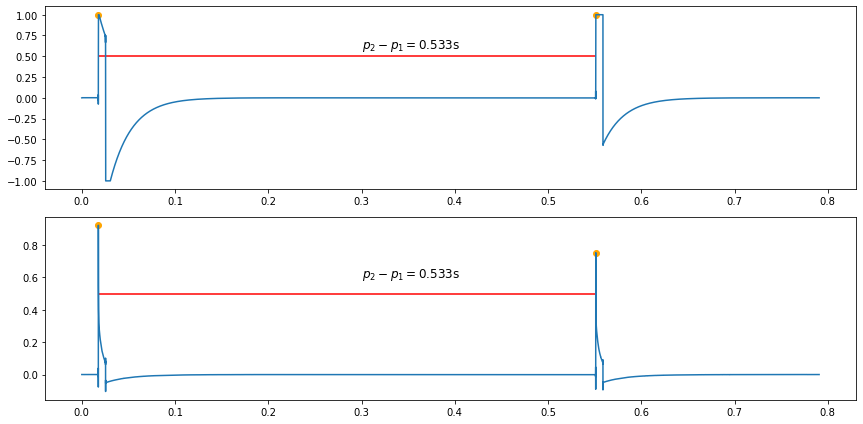

In [70]:
fig, axs = plt.subplots(2, figsize = (12,6))

# make t in seconds
t = np.linspace(0, clip.shape[0]/sample_rate, clip.shape[0])

# plot raw
axs[0].plot(t, clip[:,0])
axs[1].plot(t, clip[:,1])
# plot peaks
axs[0].scatter(t[peaks], clip[:,0][peaks], color = 'orange')
axs[1].scatter(t[peaks], clip[:,1][peaks], color = 'orange')
# plot delta p
axs[0].hlines(.5 , *t[peaks], color = 'red')
axs[1].hlines(.5 , *t[peaks], color = 'red')
# plot text with resulting dp
axs[0].text(.3, .6,
            "$p_2 - p_1 = {:.3f}$s".format((peaks[1] - peaks[0])/sample_rate),
           fontsize = 12)
axs[1].text(.3, .6,
            "$p_2 - p_1 = {:.3f}$s".format((peaks[1] - peaks[0])/sample_rate),
           fontsize = 12)
plt.tight_layout()

# fig.savefig('audio_recordings/signal_peak_detection_photodiode.png', facecolor = 'white', transparent = False)